In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('heart.csv')

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [4]:
X= np.array(df.drop(columns= ['target']))
y= np.array(df['target'])

In [5]:
def rescale(x, avg, dev):
    avg= np.mean(x, axis=0)
    dev= np.std(x, axis=0)
    x_rescaled= (x- avg)/dev
    print(x[0])
    x_rescaled[0]
    return x_rescaled

In [7]:
X_train_raw = X[:250]
X_test_raw = X[250:]
train_avg = np.mean(X_train_raw, axis=0)
train_dev = np.std(X_train_raw, axis=0)
X_train = rescale(X_train_raw, train_avg, train_dev)
X_test = rescale(X_test_raw, train_avg, train_dev)
y_train= y[:250]
y_test= y[250:]

[ 57.    1.    0.  150.  276.    0.    0.  112.    1.    0.6   1.    1.
   1. ]
[ 70.   1.   1. 156. 245.   0.   0. 143.   0.   0.   2.   0.   2.]


In [8]:
learning_rate= 0.01
iterations=1000

In [9]:
m,n= X_train.shape
w=np.zeros(n)
b=0
costs=[]

In [17]:
def fit():
    for i in range(iterations):
        cost = update_weights()
        costs.append(cost)
        if i % 100 == 0:
            print(f"Iteration {i}: Cost {cost:.4f}")
            
def update_weights():
    global w, b
    z= np.dot(X_train, w) +b
    sigmoid= 1/(1+np.exp(-z))
    cost = -1/m * np.sum(y_train * np.log(sigmoid + 1e-15) + (1 - y_train) * np.log(1 - sigmoid + 1e-15))
    dw= (1/m) * np.dot(X_train.T, (sigmoid- y_train))
    db= (1/m) *np.sum(sigmoid- y_train)
    w= w- learning_rate* dw
    b= b- learning_rate* db
    return cost

def predict():
    z= np.dot(X_test, w) +b
    y_pred= 1/(1+np.exp(-z))
    y_pred= np.where(y_pred>0.5, 1, 0)
    return (y_pred)
    


Iteration 0: Cost 0.3666
Iteration 100: Cost 0.3648
Iteration 200: Cost 0.3633
Iteration 300: Cost 0.3621
Iteration 400: Cost 0.3611
Iteration 500: Cost 0.3603
Iteration 600: Cost 0.3596
Iteration 700: Cost 0.3590
Iteration 800: Cost 0.3585
Iteration 900: Cost 0.3581


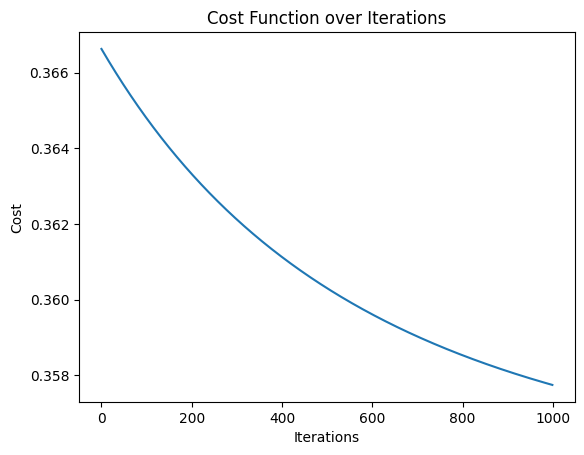

Predictions for X_test:
[1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 1 0
 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1]


In [18]:
costs=[]
fit()
plt.plot(range(iterations), costs)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function over Iterations")
plt.show()
results = predict()
print("Predictions for X_test:")
print(results)

In [19]:
y[250:]

array([1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1])

In [21]:
accuracy = np.mean(results == y_test)
print(f"Model Accuracy: {accuracy:.2f}%")

Model Accuracy: 0.85%
